In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools

In [350]:
df=pd.read_excel("Superstore.xls")

In [351]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [352]:
df_new=pd.DataFrame(columns=['Order Date','Sales'])
df_new['Order Date']=df['Order Date']
df_new['Sales']=df['Sales']

In [353]:
df_new

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


### Indexing the dataframe with date

In [354]:
df_new.set_index('Order Date', inplace=True)


### Since our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [355]:
y = df_new['Sales'].resample('MS').mean()

In [356]:
y=pd.DataFrame(y)

<Figure size 700x500 with 0 Axes>

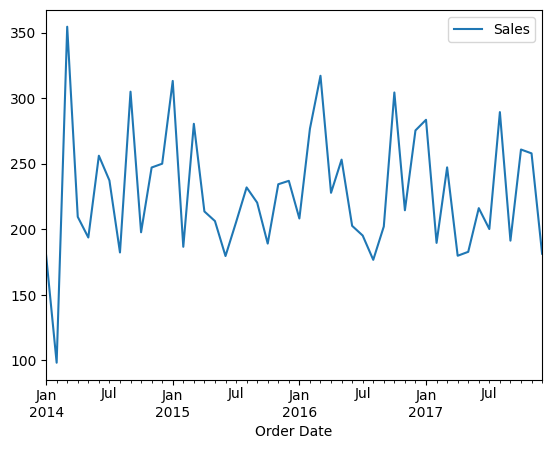

<Figure size 700x500 with 0 Axes>

In [357]:
y.plot()
plt.figure(figsize=(7, 5))

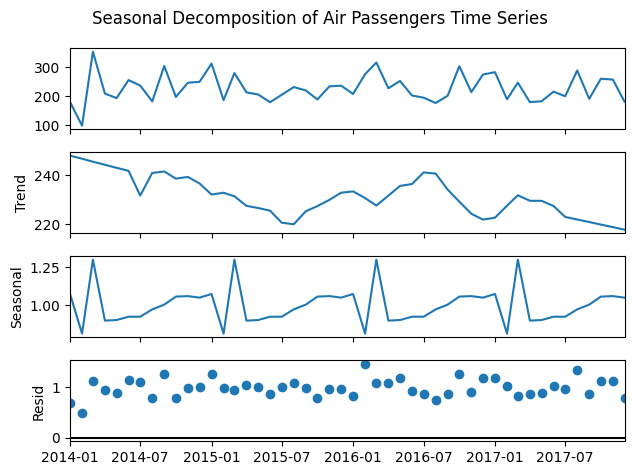

In [358]:
# Decompose the time series into trend, seasonal and residual components
result = seasonal_decompose(y, model='multiplicative', extrapolate_trend='freq')
result.plot()
plt.suptitle('Seasonal Decomposition of Air Passengers Time Series')
plt.tight_layout()
plt.show()


In [359]:
from statsmodels.tsa.stattools import adfuller

### Checking if Data is Stationary or not 

In [360]:
#H0 = It is non stationary
#HA = It is Stationary
result = adfuller(y)
labels = ['ADF Test Statistics', 'P-Value','Lags used','number of observations used']
for value,label in zip(result,labels):
    print(label+':'+str(value))
if result[1]<0.05:
    print("Reject the Null hypothesis, i.e. the data is Stationary")
else:
    print("Accept the Null Hypothesis, i.e. the data is Non Stationary")
    


ADF Test Statistics:-3.2865668298704285
P-Value:0.015489720191097362
Lags used:10
number of observations used:37
Reject the Null hypothesis, i.e. the data is Stationary


### Reasons for Making Data Stationary
#### Consistent Statistical Properties:
##### Definition: A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, are constant over time.
##### Importance: Many time series models, including ARIMA, assume stationarity. If the data is non-stationary, the model parameters may change over time, making predictions unreliable.

### Since the Data is Stationary, So we do not need to perform Differencing

### ARIMA Model

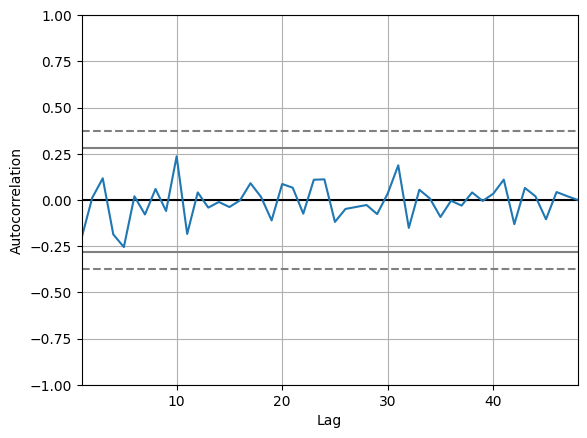

In [361]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y)
plt.show()

In [362]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm

In [363]:
len(y)

48

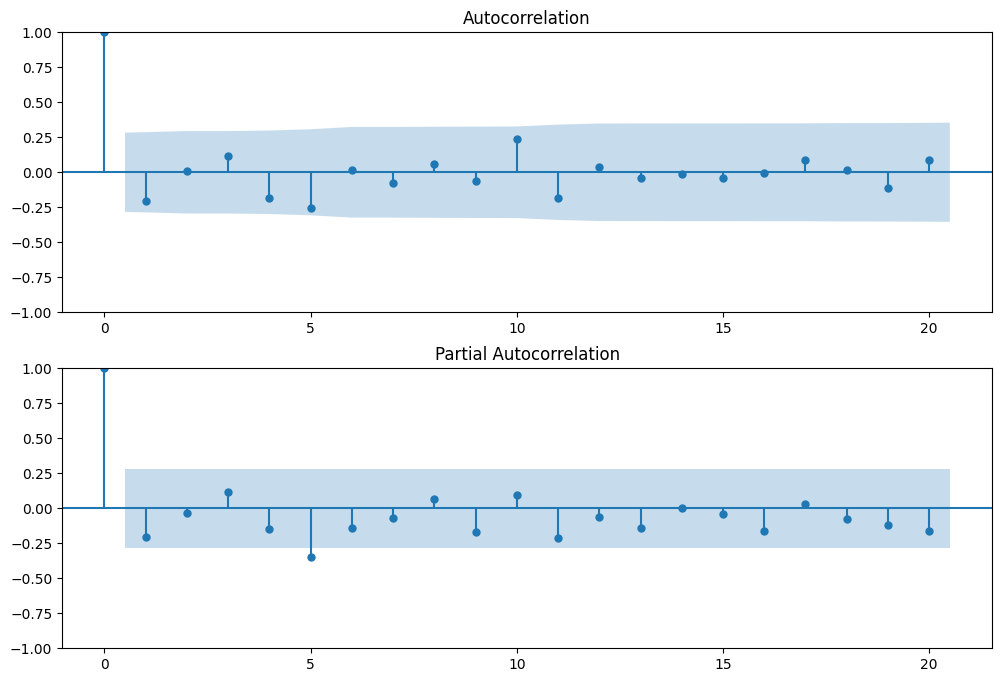

In [364]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(y,lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(y,lags=20,ax=ax2)

In [365]:
# p=1 , d=0, q=1

In [366]:
from statsmodels.tsa.arima.model import ARIMA 

In [367]:
model = ARIMA(y,order=(1,0,1))
pred = model.fit()

In [368]:
pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -249.530
Date:                Mon, 08 Jul 2024   AIC                            507.060
Time:                        00:43:51   BIC                            514.545
Sample:                    01-01-2014   HQIC                           509.889
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        229.8884      1.462    157.201      0.000     227.022     232.755
ar.L1          0.6139      0.175      3.514      0.000       0.271       0.956
ma.L1         -0.9997     28.594     -0.035      0.972     -57.043      55.043
sigma2      1820.4827   5.19e+04      0.035      0.972      -1e+05    1.04e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.93   Prob(JB):                         0.86
Heteroskedasticity (H):               0.48   Skew:                             0.01
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Order Date'>

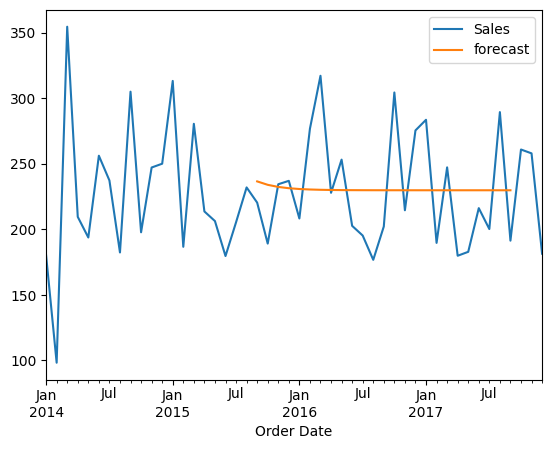

In [369]:
y['forecast']=pred.predict(start=20,end=44, dynamic=True)
y[['Sales','forecast']].plot()

In [370]:
import statsmodels.api as sm1

In [371]:
min(res)

229.88521298963786

In [372]:
model1 = sm1.tsa.statespace.SARIMAX(y['Sales'],order=(1,0,1),seasonal_order=(1,0,1,12))
pred1 = model1.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.82937D+00    |proj g|=  7.76837D-01

At iterate    5    f=  5.38515D+00    |proj g|=  7.40477D-03

At iterate   10    f=  5.36781D+00    |proj g|=  3.54409D-03

At iterate   15    f=  5.35920D+00    |proj g|=  4.99806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     27      1     0     0   5.811D-04   5.357D+00
  F =   5.3566752469129169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


<Axes: xlabel='Order Date'>

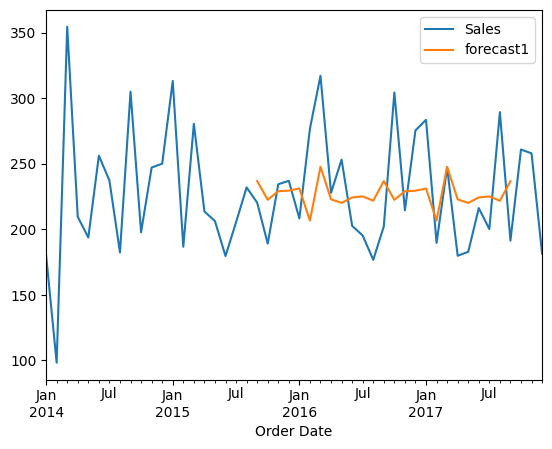

In [373]:
y['forecast1']=pred1.predict(start=20,end=44, dynamic=True)
y[['Sales','forecast1']].plot()

In [374]:
mse = ((y['forecast1'] - y['Sales']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1604.13


In [375]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 40.05


### Forecast 

In [376]:
from pandas.tseries.offsets import DateOffset
future_dates=[y.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [377]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=y.columns)

In [378]:
future_datest_df.tail()

,Sales,forecast,forecast1
2019-07-01,NaN,NaN,NaN
2019-08-01,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN
2019-11-01,NaN,NaN,NaN


In [379]:
future_df=pd.concat([y,future_datest_df])

/var/folders/vd/vsm0715j097b6dq47vmqxprc0000gn/T/ipykernel_3186/2331188388.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([y,future_datest_df])


<Axes: >

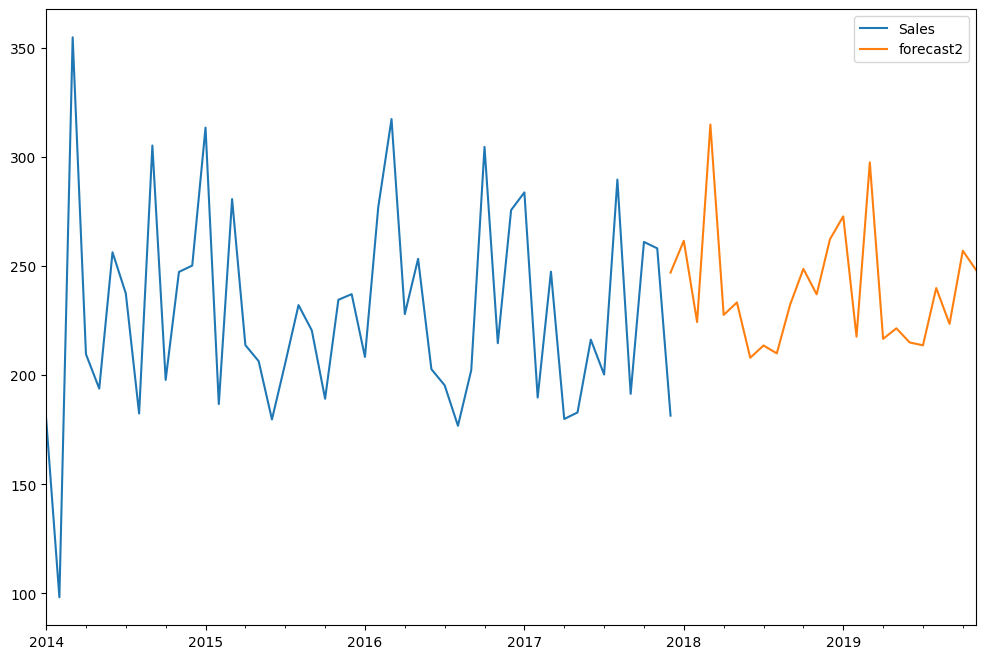

In [382]:
future_df['forecast2'] = results.predict(start = 47, end = 72, dynamic= True)  
future_df[['Sales', 'forecast2']].plot(figsize=(12, 8))